Ref: https://github.com/ReiCHU31/Cat-Dog-Classification-Flask-App/blob/master/Dog%20vs.%20Cat%20Classification%20CNN%20model.ipynb

But we use the way of tf courses. The model is the same as in the above ref!

In [1]:
# In case: Not found: No algorithm worked!
# In case: This is probably because cuDNN failed to initialize

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential

In [3]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [4]:
pre_trained_model = MobileNetV2(input_shape = (192, 192, 3),include_top = False)
pre_trained_model.trainable = False

# last_layer = pre_trained_model.get_layer('mixed7')
# print('last layer output shape: ', last_layer.output_shape)
# last_output = last_layer.output

9412608/9406464 [==============================] - 0s 0us/step


In [6]:
last_output = pre_trained_model.output
last_output

<KerasTensor: shape=(None, 6, 6, 1280) dtype=float32 (created by layer 'out_relu')>

In [ ]:
# pre_trained_model.summary()

In [7]:
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,340,098
Trainable params: 82,114
Non-trainable params: 2,257,984
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [10]:
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# base_dir = '../dataset/cats_and_dogs_filtered'

!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (192, 192))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (192, 192))

--2021-01-11 16:17:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.28.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   113MB/s    in 0.6s    

2021-01-11 16:17:07 (113 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') is not None and logs.get('accuracy') > 0.98) :
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True

my_callback = myCallback()

In [15]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2,
            callbacks=[my_callback])

Epoch 1/20
100/100 - 22s - loss: 0.1034 - accuracy: 0.9645 - val_loss: 0.0627 - val_accuracy: 0.9730
Epoch 2/20
100/100 - 21s - loss: 0.0928 - accuracy: 0.9650 - val_loss: 0.0773 - val_accuracy: 0.9700
Epoch 3/20
100/100 - 21s - loss: 0.1002 - accuracy: 0.9635 - val_loss: 0.0556 - val_accuracy: 0.9800
Epoch 4/20
100/100 - 21s - loss: 0.0890 - accuracy: 0.9635 - val_loss: 0.0543 - val_accuracy: 0.9770
Epoch 5/20
100/100 - 22s - loss: 0.0817 - accuracy: 0.9725 - val_loss: 0.1043 - val_accuracy: 0.9640
Epoch 6/20
100/100 - 21s - loss: 0.0850 - accuracy: 0.9640 - val_loss: 0.0536 - val_accuracy: 0.9820
Epoch 7/20
100/100 - 21s - loss: 0.0878 - accuracy: 0.9660 - val_loss: 0.0522 - val_accuracy: 0.9800
Epoch 8/20
100/100 - 21s - loss: 0.0668 - accuracy: 0.9750 - val_loss: 0.0522 - val_accuracy: 0.9790
Epoch 9/20
100/100 - 21s - loss: 0.0742 - accuracy: 0.9730 - val_loss: 0.0807 - val_accuracy: 0.9760
Epoch 10/20
100/100 - 21s - loss: 0.0665 - accuracy: 0.9730 - val_loss: 0.0568 - val_accura

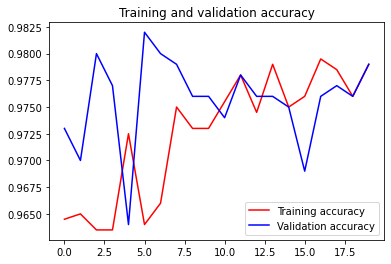

<Figure size 432x288 with 0 Axes>

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

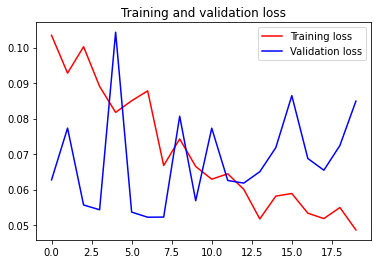

<Figure size 432x288 with 0 Axes>

In [19]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [16]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [17]:
model.save("drive/MyDrive/ML_colab/save/cat_dog/SavedModel_cat_dog_vn_like")
model.save("drive/MyDrive/ML_colab/save/cat_dog/model_cat_dog_vn_like.h5")

INFO:tensorflow:Assets written to: drive/MyDrive/ML_colab/save/cat_dog/SavedModel_cat_dog_vn_like/assets


In [20]:
labels = (validation_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'cats', 1: 'dogs'}

In [22]:
steps = validation_generator.n // validation_generator.batch_size
steps

50

In [24]:
import numpy as np

In [25]:
validation_generator.reset()
pred = model.predict(validation_generator, steps=steps, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
predictions = [labels[k] for k in predicted_class_indices]
predicted_class_indices

50/50 [==============================] - 3s 62ms/step


array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [33]:
pred

array([[3.1802916e-05, 9.9996817e-01],
       [5.4915092e-04, 9.9945086e-01],
       [6.5454996e-01, 3.4545004e-01],
       ...,
       [9.9999285e-01, 7.2005860e-06],
       [4.1285999e-05, 9.9995875e-01],
       [1.5065670e-05, 9.9998498e-01]], dtype=float32)

In [36]:
# file_path = '../dataset/cats_and_dogs_filtered/test/' # current dir
from tensorflow.keras.preprocessing import image
file_path = "drive/MyDrive/ML_colab/dataset/test_cat_dog/"
test_files = os.listdir(file_path)

for file in test_files:
    # predicting images
    path=file_path + file
    img=image.load_img(path, target_size=(192, 192))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    classes = np.argmax(classes, axis=0)

    print(classes[0])

    if classes[0]>0:
        print(file + " is a dog")

    else:
        print(file + " is a cat")

0
dog4.jpeg is a cat
0
dog1.jpg is a cat
0
dog3.jpg is a cat
0
dog2.jpg is a cat
0
cat.jpeg is a cat
0
cat_2.jpeg is a cat


In [32]:
path = "drive/MyDrive/ML_colab/dataset/test_cat_dog/cat.jpeg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images)
classes

array([[0.6790887 , 0.32091123]], dtype=float32)